<a href="https://colab.research.google.com/github/chickenwang6/quikdraw/blob/main/Own_Model_Attempt_Quikdraw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BEGINNING OF A NEW CHAPTER BABY

In [ ]:
import torch
from torch import nn

# Set up device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Simply load data

import requests
import zipfile
from pathlib import Path

# setup path to data folder
data_path = Path("test/")
image_path = data_path / "quikdraw"

# Setup a path to a data folder
if image_path.is_dir():
  print('no')
else:
  image_path.mkdir(parents=True, exist_ok=True)

# Unzip the file
with zipfile.ZipFile("lol.zip", "r") as zip_ref:
    zip_ref.extractall(data_path)

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)
# Get the path names
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

There are 2 directories and 0 images in 'test/quikdraw'.
There are 3 directories and 0 images in 'test/quikdraw/train'.
There are 0 directories and 103 images in 'test/quikdraw/train/monkeys'.
There are 0 directories and 101 images in 'test/quikdraw/train/airplanes'.
There are 0 directories and 107 images in 'test/quikdraw/train/skulls'.
There are 3 directories and 0 images in 'test/quikdraw/test'.
There are 0 directories and 25 images in 'test/quikdraw/test/monkeys'.
There are 0 directories and 23 images in 'test/quikdraw/test/airplanes'.
There are 0 directories and 25 images in 'test/quikdraw/test/skulls'.


(PosixPath('test/quikdraw/train'), PosixPath('test/quikdraw/test'))

Random image path: test/quikdraw/train/monkeys/Screenshot (240) - Copy - Copy - Copy.png
Image class: monkeys
Image height: 121
Image width: 120


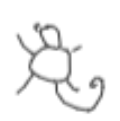

In [ ]:
import random
from PIL import Image
import numpy as np
import torchvision
import torchvision.transforms as transforms

# NOTE: image_path = data_path / "quikdraw"

# Get all the image paths
image_path_list = list(image_path.glob("*/*/*"))

# choose random
random_image_path = random.choice(image_path_list)

# class
image_class = random_image_path.parent.stem

img = Image.open(random_image_path).convert("RGB")

# Open image
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


(-0.5, 119.5, 120.5, -0.5)

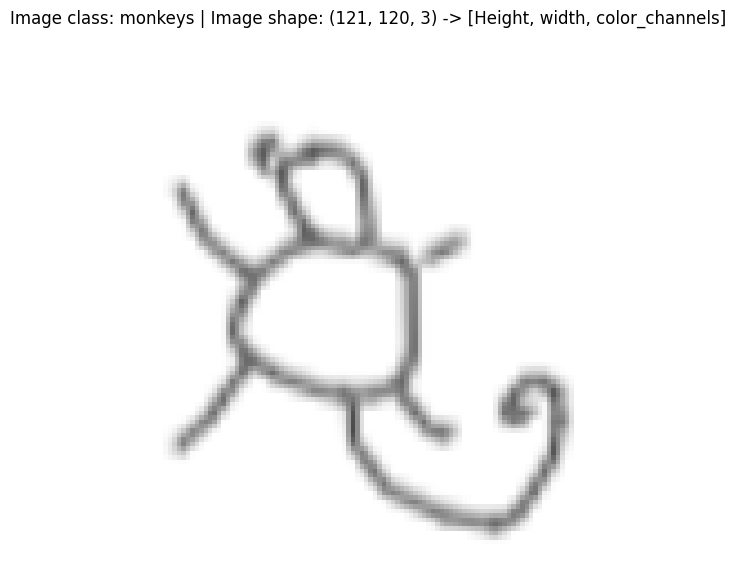

In [ ]:
# Try to visualize image with mathplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [Height, width, color_channels]") # HWC
plt.axis(False)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transform the image
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Grayscale(1),
    transforms.ToTensor()
])

#  # CHW (color, height, width)

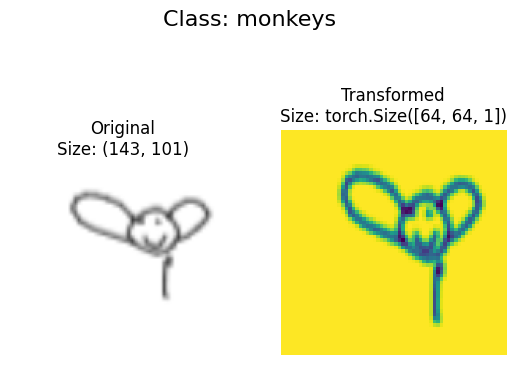

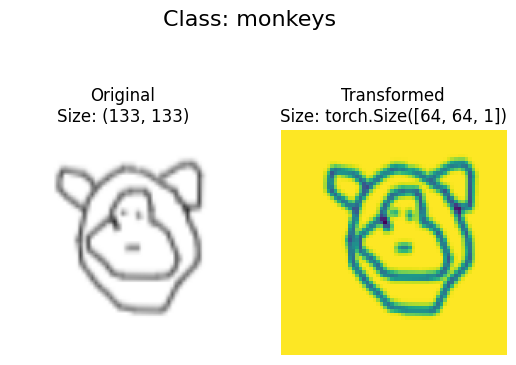

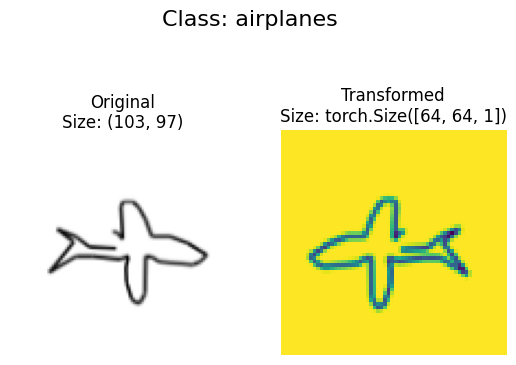

In [ ]:
from traitlets.traitlets import ForwardDeclaredInstance
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of imgaes and loads/transforms
  them then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      # index 0 is the 3rd input, 0th index is 1st input, 1st index is 2nd input
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape, SO USE PERMUTE()!!!
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis(False) # or "off"

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
import os

BATCH_SIZE=4
# Create the train data and test data
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None, # a transform for the label/target
                                  )

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

# Convert it into dataloaders
class_names = train_data.classes
class_dict = train_data.class_to_idx

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False)

In [ ]:
# GO BACK TO WEBSITE AND TAKE A LOOK IN THE FUTURE
class QuickDrawModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(num_features=hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(num_features=hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2), # Default stride value is same as kernel size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(num_features=hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(num_features=hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2), # Default stride value is same as kernel size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )


  def forward(self, x):
    x = self.conv_block_1(x) # speeds up computation
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
model_0 = QuickDrawModelV0(input_shape=1,
                           hidden_units=10,
                           output_shape=len(train_data.classes)).to(device)
# model_0

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 1, 64, 64])

Output logits:
tensor([[-0.0041, -0.0315, -0.0070]])

Output prediction probabilities:
tensor([[0.3367, 0.3276, 0.3357]])

Output prediction label:
tensor([0])

Actual label:
1


In [ ]:
# Train and test steps

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  # Put the model into training mode
  model.train()
  # Set up training loss and accuracy
  train_loss, train_acc = 0, 0
  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    test_pred_logits = model_0(X)

    # 2. Calculate loss
    loss_logits = loss_fn(test_pred_logits, y)
    train_loss += loss_logits.item()

    # 3. Zero the optimizer
    optimizer.zero_grad()

    # 4. Backpropogation
    loss_logits.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(test_pred_logits)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from pathlib import Path
# 1. Create directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          optimizer2: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 3):

    # Store best accuracy
    best_accuracy = 0.0

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    optimToUse = optimizer
    for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimToUse)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn)

      # 4. Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      if ((epoch != 0) and (sum(results["train_acc"]) / len(results["train_acc"]) > 0.85)):
        print("using optim 2.")
        optimToUse = optimizer2
      else:
        optimToUse = optimizer

      if (test_acc > best_accuracy) and (test_acc > 0.85):
        # Update best acc
        best_accuracy = test_acc
        # Create model save path
        MODEL_NAME = (str(epoch) + "_quikdraw_workflow_model_0.pth")
        MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
        # Save file
        torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

      # 5. Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = QuickDrawModelV0(input_shape=1, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# IDEAL OPTIMIZERS, SEARCH THEM UP!
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001, weight_decay=1e-4)
optimizer2 = torch.optim.Adam(params=model_0.parameters(),
                              lr=1e-5, weight_decay=1e-6)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        optimizer2=optimizer2,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9758 | train_acc: 0.5833 | test_loss: 0.5497 | test_acc: 0.8026


KeyboardInterrupt: ignored

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 64, 64])
Test sample label: 1 (monkeys)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_0,
                             data=test_samples)

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 0, 0, 0, 2, 2, 2, 2])

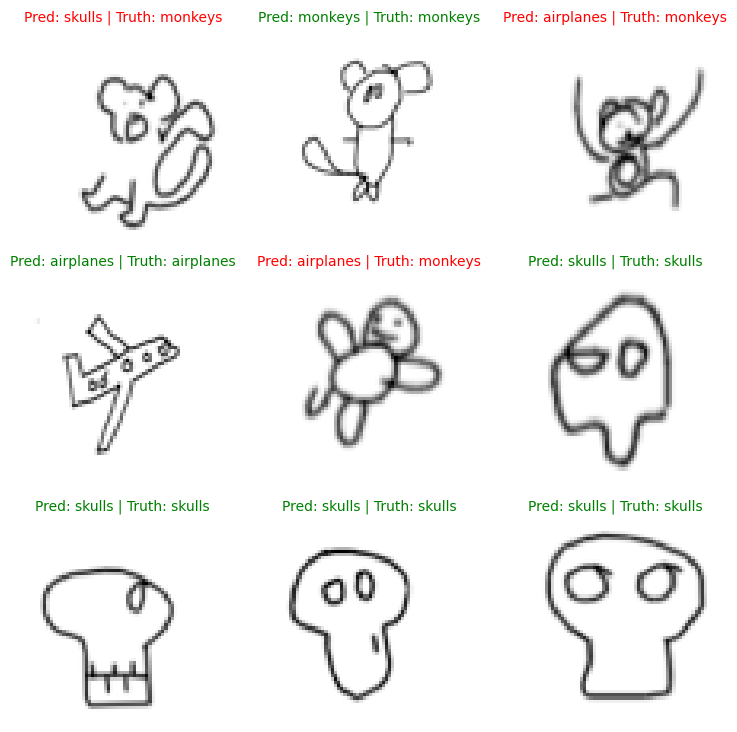

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

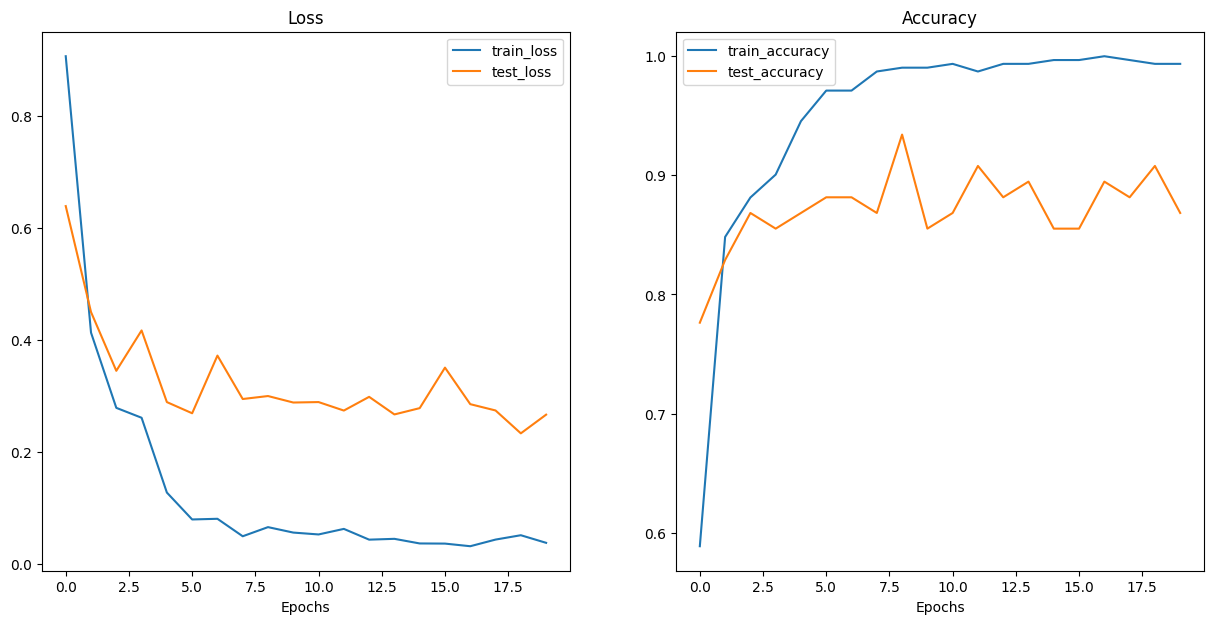

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
# # Saving PyTorch model:
# from pathlib import Path

# # 1. Create directory
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

# # 2. Create model save path
# MODEL_NAME = "01_quikdraw_workflow_model_0.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# torch.save(obj=model_0.state_dict(),
#            f=MODEL_SAVE_PATH)
